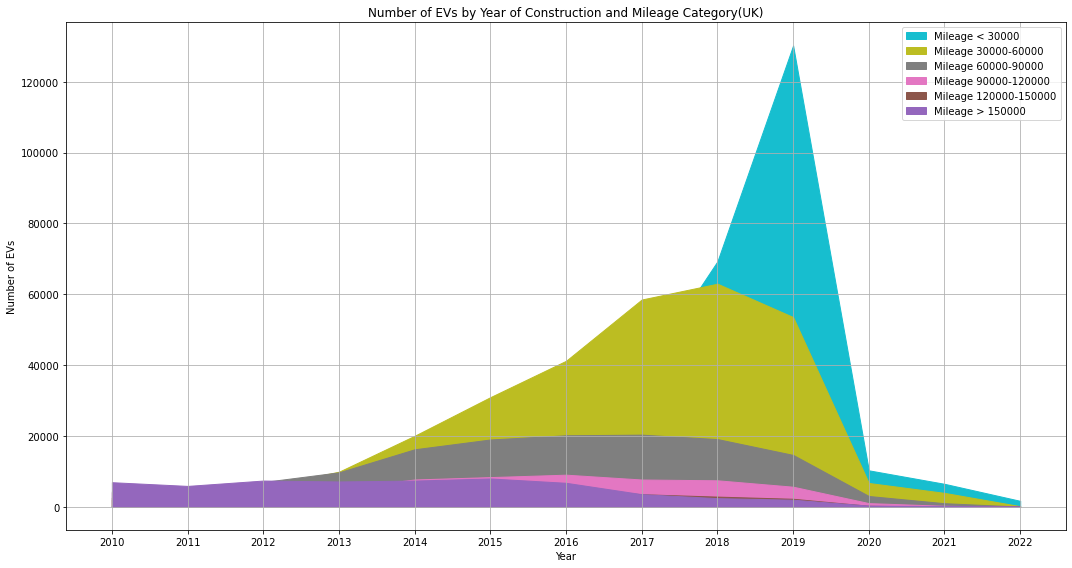

In [3]:

######### 2_1 Number of EVs by Year of Construction and Mileage Category (UK)  #########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]

# csv_url = 'C:/Users/varun/Downloads/test vehicle.csv'
# df = pd.read_csv(csv_url, delimiter=',', error_bad_lines=False)

# calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']

df = df[['start', 'test_mileage']]
string_counts = df['start'].value_counts()
df['year_count'] = df['start'].map(string_counts)

def assign_value(x):
    if x <= 30000:
        return 1
    elif 30000 < x <= 60000:
        return 2
    elif 60000 < x <= 90000:
        return 3
    elif 90000 < x <= 120000:
        return 4
    elif 120000 < x <= 150000:
        return 5
    else:
        return 6

df['Mileage_category'] = df['test_mileage'].apply(assign_value)

# Group by 'start' and 'Mileage_category', and get the count of similar values in each group
grouped_df = df.groupby(['start', 'Mileage_category']).size().reset_index(name='year_count')

# Mapping dictionary for Mileage_category descriptions
category_mapping = {
    1: 'Mileage < 30000',
    2: 'Mileage 30000-60000',
    3: 'Mileage 60000-90000',
    4: 'Mileage 90000-120000',
    5: 'Mileage 120000-150000',
    6: 'Mileage > 150000'
}

# Create a DataFrame with years from 2010 to 2022
years = range(2010, 2023)
data = pd.DataFrame({'Year': years})

# Add each 'year_count' category as a separate column
for category in sorted(grouped_df['Mileage_category'].unique()):
    year_counts = [grouped_df[(grouped_df['start'] == year) & (grouped_df['Mileage_category'] == category)]['year_count'].sum() for year in years]
    data[f'Year_Count_Category_{category_mapping[category]}'] = year_counts

# Plot the stacked area plot
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10.colors[::-1]  # Reverse the list of colors to place lower cat areas in front

for i, category in enumerate(sorted(grouped_df['Mileage_category'].unique())):
    category_description = category_mapping[category]
    plt.fill_between(data['Year'], data[f'Year_Count_Category_{category_description}'], color=colors[i], label=f'{category_description}')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.title('Number of EVs by Year of Construction and Mileage Category(UK)')
plt.grid(True)
plt.xticks(range(2010, 2023))
plt.legend()
plt.tight_layout()
plt.show()
